In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float

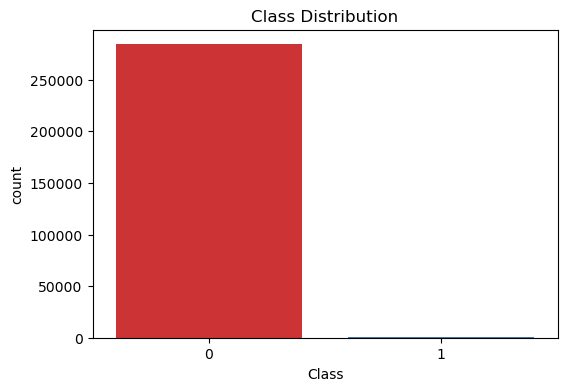

In [59]:
data = pd.read_csv("Data/creditcard.csv")

print("Dataset Overview:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Explore the distribution of classes (fraudulent vs. non-fraudulent transactions)
print("\nClass Distribution:")
print(data['Class'].value_counts())

# Visualize the class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette='Set1')
plt.title('Class Distribution')
plt.show()

In [60]:
data = data.drop('Time', axis=1)
X = data.drop('Class', axis=1)
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [61]:
# underSampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
# X_resampled, y_resampled = underSampler.fit_resample(X_train, y_train)
# 
# print("Preprocessed Data Overview:")
# print("X_train shape:", X_resampled.shape)
# print("y_train distribution:\n", y_resampled.value_counts())

In [66]:
def build_adversarial_network(input_dim, lr):
    input_layer = Input(shape=(input_dim,))
    
    # Generator
    generator = Dense(128, activation='relu')(input_layer)
    generator = Dropout(0.3)(generator)
    generator = Dense(64, activation='relu')(generator)
    generator = Dense(input_dim, activation='sigmoid')(generator)
    
    # Discriminator
    discriminator = Dense(64, activation='relu')(generator)
    discriminator = Dropout(0.3)(discriminator)
    discriminator = Dense(32, activation='relu')(discriminator)
    discriminator_output = Dense(1, activation='sigmoid')(discriminator)

    # Build and compile the model
    model = Model(inputs=input_layer, outputs=discriminator_output)
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    return model

Epoch 1/20
3561/3561 [==============================] - 12s 3ms/step - loss: 0.0362 - accuracy: 0.9967
Epoch 2/20
3561/3561 [==============================] - 11s 3ms/step - loss: 0.0040 - accuracy: 0.9991
Epoch 3/20
3561/3561 [==============================] - 11s 3ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/20
3561/3561 [==============================] - 11s 3ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 5/20
3561/3561 [==============================] - 11s 3ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 6/20
3561/3561 [==============================] - 11s 3ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 7/20
3561/3561 [==============================] - 11s 3ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 8/20
3561/3561 [==============================] - 11s 3ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 9/20
3561/3561 [==============================] - 11s 3ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 10/20
3561/3561 [==============================] - 11s 3ms/step - l

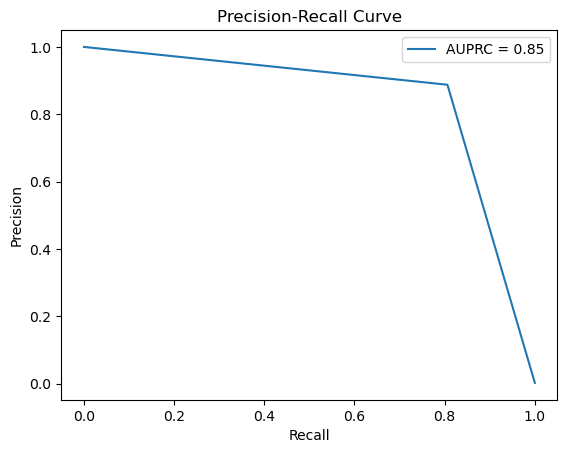

In [71]:
from sklearn.metrics import precision_recall_curve, auc

input_dim = X_train.shape[1]
# 
# learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
# 
# # Perform grid search over learning rates
# for lr1 in learning_rates:
#     print(f"\nTesting Learning Rate: {lr1}")
#     
#     # Build and train the adversarial model
#     adversarial_model = build_adversarial_network(input_dim, lr1)
#     adversarial_model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)
# 
#     # Evaluate the model on the test set
#     y_pred = (adversarial_model.predict(X_test) > 0.5).astype("int32")
#     
#     # Display classification report for each learning rate
#     print(f"Learning Rate: {lr1}")
#     print(classification_report(y_test, y_pred))
#     
#     precision, recall, _ = precision_recall_curve(y_test, y_pred)
#     auprc = auc(recall, precision)
#     print(f"AUPRC: {auprc}")


adversarial_model = build_adversarial_network(input_dim, 0.0001)

adversarial_model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

y_pred = (adversarial_model.predict(X_test) > 0.5).astype("int32")
print("\nAdversarial Network Evaluation:")
print(classification_report(y_test, y_pred))

precision, recall, _ = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)
print(f"AUPRC: {auprc}")

# Plot the precision-recall curve
plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest model
random_forest = RandomForestClassifier()

# Fit the model on the resampled training data
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)
print("\nAdversarial Network Evaluation:")
print(classification_report(y_test, y_pred_rf))



Adversarial Network Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


In [49]:
from xgboost import XGBClassifier

# Instantiate the XGBoost model
xgboost_model = XGBClassifier()

# Fit the model on the resampled training data
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgboost = xgboost_model.predict(X_test)
print("\nAdversarial Network Evaluation:")
print(classification_report(y_test, y_pred_rf))


Adversarial Network Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


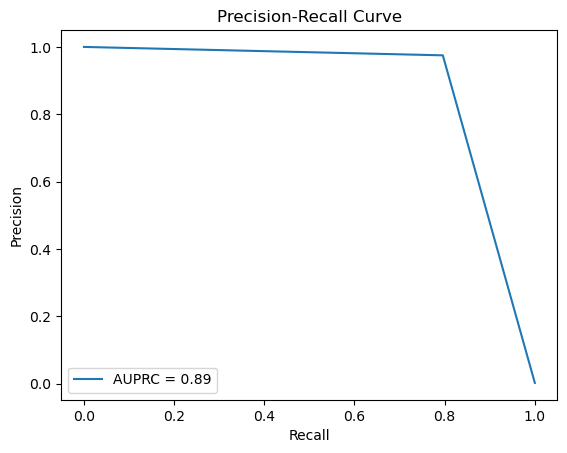